In [54]:
import cv2 # mengimport openCV untuk memproses gambar atau citra seperti membaca gambar, mengubah warna dll
import matplotlib.pyplot as plt # mengimport pyplot untuk memproses gambar/citra
import numpy as np # mengimport numpy untuk mempermudah pengolahan angka
import math

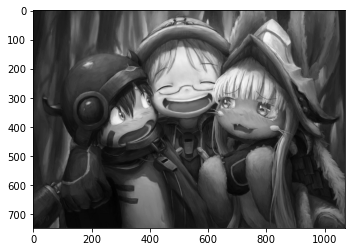

In [55]:
image=cv2.imread("modul6.jpg") # baris code untuk membaca gambar dan menyimpannya dalam variabel image 
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY) # mengkonversi warna dari RGB ke GRAY dan menyimpannya dalam variabel gray
plt.imshow(gray,"gray") # menampilkan gambar yang sudah di konversi (gray) dengan color map "gray"

In [60]:
# fungsi untuk melakukan deteksi tepi
def deteksi_tepi(image,kernelX,kernelY): # deklarasi nama fungsi dan parameter input yang dibutuhkan yaitu :
                                         # image -> gambar yang akan di deteksi serta kernelX dan kernelY dari masing-masing operator
    pdImage=np.pad(image,1) # berfungsi untuk memberikan padding 0 pada image yang akan dideteksi dengan ukuran 1 pixel pada setiap sisi
                            # serta menyimpannya dalam variabel baru
    Image_baru=np.zeros(image.shape) # membuat numpy baru berelemen nol dengan ukuran sesuai ukuran image yang akan di deteksi sebagai wadah untuk menyimpan hasil deteksi tepi
    y,x=Image_baru.shape # mengambil ukuran baris dan kolom dari si image_baru dan menyimpannya dalam variabel y dan x
    for i in range (y): # melakukan perulangan sebanyak y atau sebanyak baris dari image untuk mengunjungi semua pixel pada baris citra
        for j in range (x): # melakukan peulangan sebanyak x atau sebanyak kolom dari image untuk mengunjungi semua pixel pada kolom citra
            s=0 # deklarasi variabel baru untuk menyimpan hasil deteksi tepi dengan kernelX
            t=0 # deklarasi variabel baru untuk menyimpan hasil deteksi tepi dengan kernelY
            for k in range (kernelX.shape[0]): # perulangan sebanyak baris kernelX
                for l in range (kernelX.shape[1]): # perulangan sebanyak kolom kernelX
                         s+=pdImage[i+k][j+l]*kernelX[k][l] # menyimpan semua hasil perkalian dari pixel tertentu(seukuran kernel X) dengan kernelX
                         t+=pdImage[i+k][j+l]*kernelY[k][l] # menyimpan semua hasil perkalian dari pixel tertentu(seukuran kernel Y) dengan kernelY
            Image_baru[i][j]= abs(s) +abs(t)    # menghitung nilai akhir dari deteksi tepi 
    Image_baru=Treshold(Image_baru)  
    return Image_baru # mengembalikan nilai Image_baru (output) 

In [61]:
 #melakukan treshold pada kebauan 128. dimana pixel yang berada diatas atau sama dengan 128 akan diubah menjadi putih dan selain itu diubah ke hitam 
def Treshold(image): # deklarasi nama fungsi dan parameter input yang dibutuhkan
    for i in range(image.shape[0]): # perulangan untuk mengunjungi semua pixel pada baris image
        for j in range(image.shape[1]): # perulangan untuk mengunjungi semua pixel pada kolom image
            # membuat kondisi apabila pixel bernilai lebih dari atau sama dengan 128 akan diubah menjadi putih (255)
            if(image[i][j] >= 128):
                image[i][j] = 255
            # dan pixel lainnya menjadi warna hitam (0)
            else: 
                image[i][j] = 0
    return image # mengembalikan nilai image (output) 

In [62]:
# Operator Sobel (ketentuan)

sobelX=np.array([(-1,0,1),(-2,0,2),(-1,0,1)])
sobelY=np.array([(1,2,1),(0,0,0),(-1,-2,-1)])

In [63]:
#memanggil fungsi deteksi tepi untuk mendeteksi tepi dengan operator sobel dan menyimpan nilai returnnya dalam variabel sobel

sobel=deteksi_tepi(gray,sobelX,sobelY)

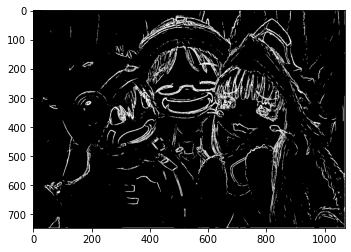

In [64]:
plt.imshow(sobel,"gray")

In [65]:
# Operator prewitt (ketentuan)

prewittX=np.array([(-1,0,1),(-1,0,1),(-1,0,1)])
prewittY=np.array([(1,1,1),(0,0,0),(-1,-1,-1)])

In [66]:
# memanggil fungsi deteksi tepi untuk mendeteksi tepi dengan operator prewitt dan menyimpan nilai returnnya dalam variabel prewitt

prewitt=deteksi_tepi(gray,prewittX,prewittY)

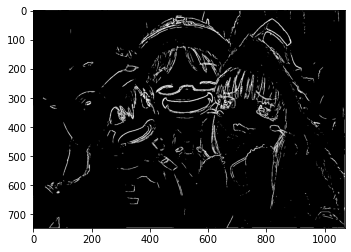

In [67]:
plt.imshow(prewitt,"gray")

In [68]:
# Operator robert (ketentuan)

robertX=np.array([(1,0),(0,-1)])
robertY=np.array([(0,1),(-1,0)])

In [69]:
#memanggil fungsi deteksi tepi untuk mendeteksi tepi dengan operator robert dan menyimpan nilai returnnya dalam variabel robert

robert=deteksi_tepi(gray,robertX,robertY)

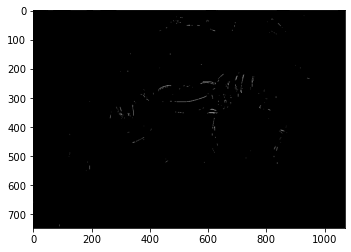

In [70]:
plt.imshow(robert,"gray")

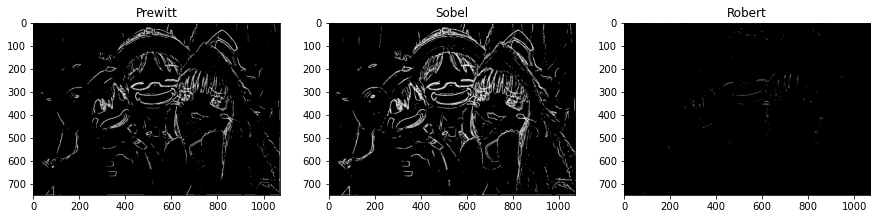

In [71]:
# menampilkan semua citra hasil dateksi tepi dari masing-masing operator
plt.figure(figsize=(15,7)) # mengatur ukuran dari tampilan citra
plt.subplot(131) # mengatur posisi dari penampilan citra
plt.title("Prewitt") # memberikan judul pada citra yang akan di tampilkan
plt.imshow(prewitt,"gray") # menampilkan prewitt dengan cmap "gray"
plt.subplot(132)
plt.title("Sobel")
plt.imshow(sobel,"gray") # menampilkan sobel dengan cmap "gray"
plt.subplot(133)
plt.title("Robert")
plt.imshow(robert,"gray")

In [77]:
a=sum(sobel_ni[255:])
b=sum(prewitt_ni[255:])
c=sum(robert_ni[255:])

# Menurut saya berdasarkan apa yang saya dapatkan dari praktikum ini, maka saya berasumsi bahwa tepi yang berhasil di deteksi
# adalah pixel yang berwarna putih (pixel dengan keabuan 255). maka:
a
# operator Sobel mampu mendeteksi lebih banyak tepi dibandingkan dengan operator lainnya. dimana terdapat 58831 pixel yang
# memiliki derajat keabuan 255

58831.0

In [79]:
b
# operator Prewitt mampu mendeteksi lebih banyak tepi dibandingkan dengan operator Robert namun lebih sedikit dibandingkan dengan operator sobel.
# dimana terdapat 36064 pixel yang memiliki derajat keabuan 255

36064.0

In [81]:
c
# operator Robert hanya mampu mendeteksi sedikit tepi dibandingkan dengan operator lainnya.
# dimana terdapat 2066 pixel yang memiliki derajat keabuan 255

2066.0

In [82]:
# control untuk menentukan Operator terbaik berdasarkan pixel yang di dapatkan (keabuan >=50 )
if b>a and b >c :
    print("Operator terbaik adalah Prewitt")
elif c>b and c >b :
    print("Operator terbaik adalah Robert")
elif a>b and a >c :
    print("Operator terbaik adalah Sobel")

Operator terbaik adalah Sobel
